In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
df = pd.read_csv("UpdatedResumeDataSet.csv")
df.head(5)
df.shape

(962, 2)

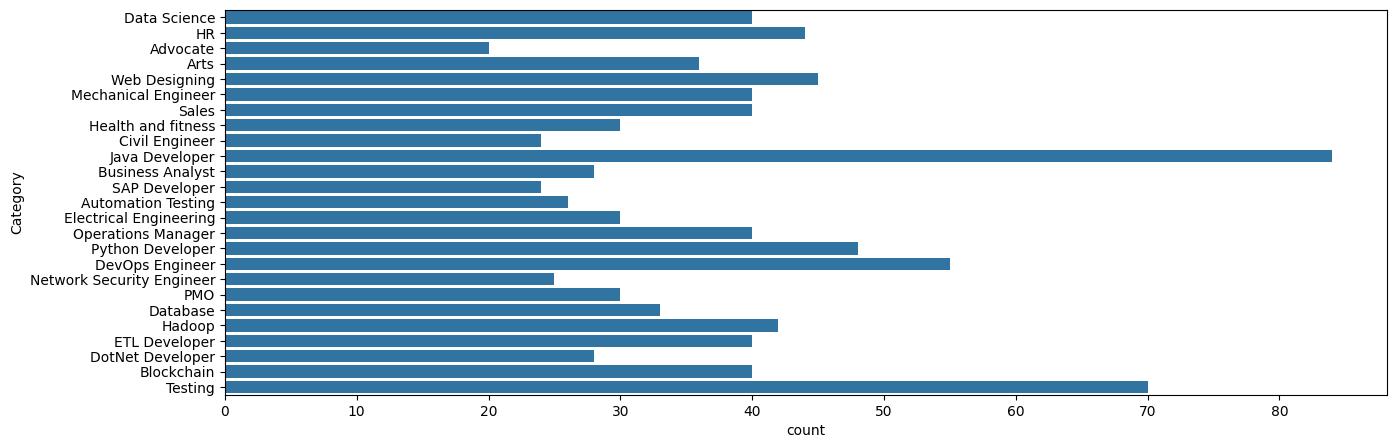

In [3]:
# df['Category'].value_counts()
plt.figure(figsize=(15,5))
sns.countplot(df['Category']) 
plt.show()

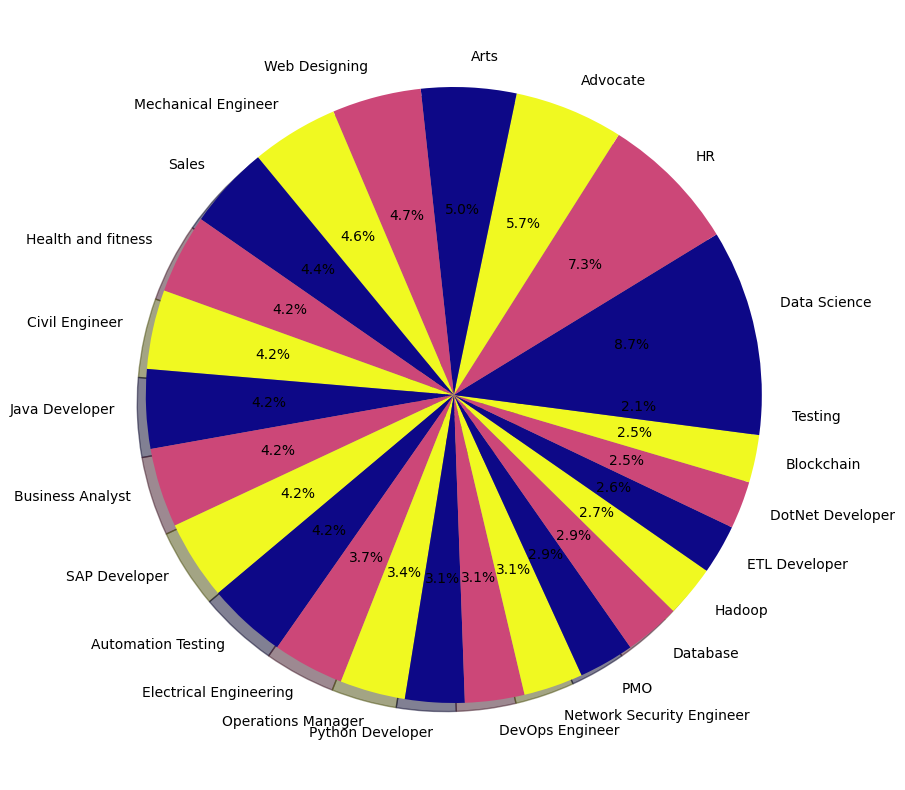

In [4]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True, colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

In [12]:
# df['Category'][0]
# df['Resume'][0]

In [13]:
print("Original Category Distribution:")
print(df['Category'].value_counts())

max_size = df['Category'].value_counts().max()
balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)
df = balanced_df.sample(frac=1).reset_index(drop=True)

print("\nBalanced Category Distribution (After Oversampling):")
print(df['Category'].value_counts())


Original Category Distribution:
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

Balanced Category Distribution (After Oversampling):
Category
DotNet Developer             84
Network Security Engineer    84
Hadoop

C:\Users\DELL\AppData\Local\Temp\ipykernel_2776\1084228020.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)


In [15]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [17]:
cleanResume("my #### $ #  #noorsaeed webiste like is this http://heloword and access it @gmain.com")

'my webiste like is this and a ess it '

In [18]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))
df['Resume'][0]

'Education Details January 2014 Education Details Pune Maharashtra University Of Pune January 2010 B Com Pune Maharashtra University Of Pune Software Developer Software Developer Technology Dot Net Skill Details Company Details company Technology Dot Net description Previous Experience worked in SepSoft ERP Solutions From 1 Jan 2016 To 24th Dec 2016 Designation Software Developer Technology Dot Net'

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])
df.Category.unique()

# ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
#       dtype=object)

array([ 9, 17, 13,  2, 10, 18, 12,  0,  1,  4,  3, 20, 21, 23, 16, 14, 22,
       19,  6, 11,  5, 24,  7,  8, 15])

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requredTaxt  = tfidf.transform(df['Resume'])

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(requredTaxt, df['Category'], test_size=0.2, random_state=42)
X_train.shape

(1680, 7351)

In [27]:
X_test.shape

(420, 7351)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train = X_train.toarray() if hasattr(X_train, 'toarray') else X_train
X_test = X_test.toarray() if hasattr(X_test, 'toarray') else X_test

# 1. Train KNeighborsClassifier
knn_model = OneVsRestClassifier(KNeighborsClassifier())
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("\nKNeighborsClassifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_knn)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_knn)}")


KNeighborsClassifier Results:
Accuracy: 1.0000
Confusion Matrix:
[[15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  

In [29]:
# 2. Train SVC
svc_model = OneVsRestClassifier(SVC())
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
print("\nSVC Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_svc)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_svc)}")


SVC Results:
Accuracy: 1.0000
Confusion Matrix:
[[15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0 

In [41]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(svc_model, open('clf.pkl', 'wb'))
pickle.dump(le, open("encoder.pkl",'wb'))

In [32]:
def pred(input_resume):
    # Preprocess the input text (e.g., cleaning, etc.)
    cleaned_text = cleanResume(input_resume) 

    # Vectorize the cleaned text using the same TF-IDF vectorizer used during training
    vectorized_text = tfidf.transform([cleaned_text])
    
    # Convert sparse matrix to dense
    vectorized_text = vectorized_text.toarray()

    # Prediction
    predicted_category = svc_model.predict(vectorized_text)

    # get name of predicted category
    predicted_category_name = le.inverse_transform(predicted_category)

    return predicted_category_name[0]  # Return the category name

In [34]:
myreume='''UDAY KAKADIYA
+91-9898685263 udayypatel001@gmail.com linkedin.com/in/uday-patel
EDUCATION
GLS UNIVERSITY
Master of Computer Application
First Year CGPA :7.68
Pursuing
MKBU UNIVERSITY
Bachelor of Computer Application
Percentage: 56.71%
2021-2024
ASHADEEP VIDHYALAYA
HSC (CLASS XII)
2021 | Surat, Gujarat
Board Percentage: 62.14%
SHREE SATUAABABA VIDHYA SANKUL
SSC (CLASS X)
2019| Palitana, Gujarat
Board Percentage: 70%
PROFILE LINKS
https://github.com/udaypatel01
Whether forcasting
COURSEWORK
Object Oriented Programming
Database Management System
Blockchain Technology
Operating System
Computer Networks
Machine Learning
Cloud Computing
SKILLS
Computer Languages:
Python, C/C++, CSS, PHP,HTML ,JS.
Databases
MySQL, PostgreSQL, SQLite, MongoDB
Framework
Django, Flask, Odoo
Libraries
• Numpy, Pandas, Scikit-Learn
PROFILE SUMMARY
A passionate MCA student focused on emerging technologies such as Al and
automation. Enjoys tackling challenging problems through creative thinking
and innovation while building practical academic projects using Python and
web technologies. Actively exploring machine learning concepts and
continuously learning new tools, including ERP platforms like Odoo, to develop
smart, scalable solutions that bring ideas to life.
PROJEСТ
Weather Application
Overview: It shows current weather conditions, temperature, and humidity for
specific location.
Tools and technology:
• Backend: PYTHON-Django, XGBoost algorithms
Front-end: HTML, CSS, JAVASCRIPT, BOOTSTRAP
• API'S: OpenWeather API.
GearGuard – Maintenance Management System
Overview :Developed a custom Odoo maintenance module to manage
equipment and maintenance requests, with automated technician assignment,
Kanban workflow, calendar scheduling, and smart request tracking.
Tools and technology:
이 Backend: Python-odoo
• Front-end: HTML, CSS, JavaScript, XML.
Ο Database: PostgreSQL
E-Commerce Website
Overview :Developed a complete online shopping system with minimalist and
user-friendly experience, include features like user authentication, product
listing, shopping cart, and payment simulation, give a seamless experience to
the user.
Tools and technology:
이 Backend: PHP.
• Front-end: HTML, CSS, JavaScript, Bootstrap.
• Database: MySQL
Voice Assistant (Basic):
Overview :Implemented a Terminal-based voice assistant that can
perform simple tasks like opening specific applications or websites
using voice commands.
Tools and technology:
• Backend: PYTHON -flask
• Api's: Google text-to-speech API for voice recognition.
Languages:
English
Gujarati
Hindi'''

In [37]:
pred(myreume)

'Data Science'

In [40]:
myresume = """EDUCATION
NIRMAUNIVERSITY
B.Tech in Computer Science &
Engineering
2020- 2024 | Ahmedabad, Gujarat
CGPA: 8.82 / 10
ASHADEEPVIDHYALAYA
HSC(CLASSXII)
2020 | Surat, Gujarat
JEE Main : 97.43
Board Percentage : 87%
ASHADEEPVIDHYALAYA
SSC(CLASS X)
2018 | Surat, Gujarat
Board Percentage: 92%
LINKS
Github:// OmMavani
LinkedIn:// OmMavani
Codeforces:// Ommavani
LeetCode:// Ommavani
Codechef:// Ommavani
COURSEWORK
UNDERGRADUATE
•DataStructures&Algorithms
•DesignandAnalysisofAlgorithms
•ObjectOrientedProgramming
•DatabaseManagementSystem
•BlockchainTechnology
•OperatingSystem
•ComputerNetworks
•MachineLearning
•CloudComputing
•TheoryofComputation
•CompilerConstruction
SKILLS
PROGRAMMING
Computer Languages:
•C/C++ •HTML
•CSS
•JavaScript
•Python •SQL
•PHP
•Java
Software and Technology:
•MySQL
•AWS
•React.js
•mongoDB
•Azure
•Node.js
•Express.js •RestAPI
EXPERIENCE
ZSASSOCIATES |BTSA
Jun 2024- Current | Pune, Maharastra
• Tech-stack-Azure,Aws,Python,andReact.js
GENXELTECHNOLOGYPVTLTD |SoftwareEngineeringSummer
Intern
June 2023- July 2023 | Surat, Gujarat
• Tech-stack-MERNStack
PROJECTS
AUTOMATEDTIMETABLEGENERATIONFORNIRMA
UNIVERSITY
Summer2023
Project Link : TTgenerator
Tech-stack Used : Python, Genetic Algorithm, DSA
• createdcompleteautomatedtimetablefornirmauniversityusingconceptof
genetic algorithm. currently Nirma University using our programtogenerate
timetable for faculty and student (classwise and semester-wise)for even sem.
ECOMMERCEWEBAPP |WebDevelopment
Summer2023
Project Link : Shop&Chill
Tech-stack Used : HTML, CSS, JavaScript, Node.js, Express.js, MongoDB,
React.js
• websiteincludepageslikehome,about,products,contact,report,support,and
features like favourite, cart, payment, login and register, rating, review etc. it
also include admindashboardandbyusingthatadmincanmangeproductsand
users.
FACERECOGNIZER
Summer2022
Project Link : FaceReco
Tech-stack Used : Flask GUI (Python), OpenCV, sklearn, EigenFaces
• Facerecognitionfeaturethatautomaticallyrecognizestheuser’s namebased
onpastdata. Livecamfeature,withsupportformultiplepeopleintheframeat
once. classification models, such as KNN,SVC,RandomForest,andMultilayer
Perception
FUNCTIONALDEPENDENCYANALYZER(NORMALISATION)
Winter 2022
Project Link : Normalisation
Tech-stack Used : DBMS, Python
• ImplementedaPythontooltofindcandidatekeysandchecknormalform
violations based on functional dependencies in agivendatabaseschema.
ACHIEVEMENTS
• FirstYearCSEGoldMedalistandBtechSilverMedalistatNirmaUniversity.
• Solved800+CodingQuestionsonVariouscodingplatforms.
• ReachtotheFinalRoundofAmazonHackOn-3.0andcleared3Roundsin
Flipkart Grid-5.0
• RunnerupatMinedHackathon(NationalLevelCompetition)Track:-D360
"""

# Now, test the model with the Advocate-focused resume
pred(myresume)

'Data Science'